<a href="https://colab.research.google.com/github/MiguelUC-Student/AMLE-Tareas/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `Miguel Romero`
- Usuario de GitHub (opcional):  `MiguelUC-Student`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# 1. Clasificación

En esta pregunta trabajaremos con un _dataset_ que contiene información campañas de marketing de un banco portugués. La campaña se enfocó en llamadas telefónicas a distintos segmentos de clientes, de forma individualizada, con el objetivo incenitvar la toma depósitos por parte de los clientes.

El problema presentado en este ejecicio busca predecir si el cliente suscribirá (sí/no) un depósito a plazo.



A continuación, se despliega información oficial sobre el _dataset_:

| Variable Name | Role    | Type        | Description                                                                                                                               |
|---------------|---------|-------------|-------------------------------------------------------------------------------------------------------------------------------------------|
| age           | Feature | Integer     |     years of age                                                                                                                                      |
| job           | Feature | Categorical | type of job |
| marital       | Feature | Categorical | marital status                          |
| education     | Feature | Categorical | Education level         |
| default       | Feature | Binary      | has credit in default?                                                                                                                    |
| balance       | Feature | Integer     | average yearly balance in euros                                                                                                                    |
| housing       | Feature | Binary      | has housing loan?                                                                                                                         |
| loan          | Feature | Binary      | has personal loan?                                                                                                                        |
| contact       | Feature | Categorical | contact communication type                                                                         |
| day_of_week   | Feature | Date        | last contact day of the month (numeric)                                                                                                              |
| month         | Feature | Date        | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                          |
| duration*      | Feature | Integer     | last contact duration, in seconds (numeric).  |
| campaign      | Feature | Integer     | number of contacts performed during this campaign and for this client                                      |
| pdays         | Feature | Integer     | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |
| previous      | Feature | Integer     | number of contacts performed before this campaign and for this client                                                                       |
| poutcome      | Feature | Categorical | outcome of the previous marketing campaign                                                |
| y             | Target  | Binary      | has the client subscribed a term deposit?                                                                                                 |


*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.



En el sitio web [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing) podrá encontrar información oficial del _dataset_.

Use el código otorgado a continuación para importar los datos.


In [1]:
pip install ucimlrepo

In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


## Exploratory Data Analysis (EDA)

### Pregunta 1.0

Concatene `X` e `y` en un dataframe consolidado.

Muestre las primeras cinco observaciones en el dataframe consolidado. Despliegue información sobre el tipo de variable de cada una de las columnas del dataframe y despliegue estadísticas descriptivas de las variables según su tipo.

In [37]:
#Concatenar dataframes
import pandas as pd
df = pd.concat([X, y], axis=1)
#Mostrar las primeras 5 observaciones
df.head()
#Informacion tipo de variables
df.info()
#Estadísticas descriptivas de las variables por tipo int
df.describe()
#Por tipo object
df.describe(exclude = "int64")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,44923,45211,43354,45211,45211,45211,32191,45211,8252,45211
unique,11,3,3,2,2,2,2,12,3,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901,39922


### Pregunta 1.1

Identifique las columnas que presentan _missing values_ e indique el número de _missing values_ que poseen.

Impute los valores nulos con el método que estime conveniente, justificando su decisión.

In [38]:
df.isnull().sum()

#Eliminacion de columnas
df = df.drop(columns=["contact", "poutcome"], axis = 1)
#Remplazar NaN por la moda de los datos
df["job"] = df["job"].fillna(df["job"].mode()[0])
df["education"] = df["education"].fillna(df["education"].mode()[0])




---


Variables que presentan valores nulos: "Job" con 288, "education" con 1857, "contact" con 13020 y "poutcome" con 36959
La imputación de las variables se decide obserservando la cantidad de missing values que presente la variable, siendo optimo eliminarla si es que contiene una gran cantidad de datos faltantes en comparación a la cantidad de datos totales. Por esta razon sería optimo eliminar toda la variable "poutcome" y "contact" por ser columnas con una mayoria de datos faltantes.
Para el caso donde las columnas presentan un menor numero de datos faltantes se puede reemplazar los valores por el promedio de los datos al ser un menor numero de observaciones


---

### Pregunta 1.2


Genere histogramas de las variables categóricas desagregando por la variable objetivo de interés. Interprete las relaciones que observa.

Responda: ¿Cuáles creen que son las variables categóricas más relevantes a la hora de determinar si el individuo hará un depósito?

<Axes: xlabel='y', ylabel='Count'>

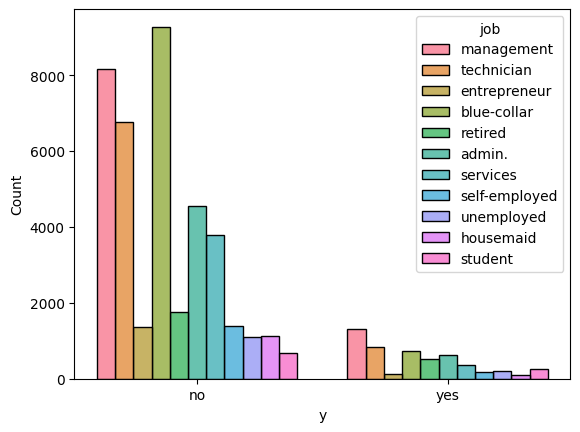

In [ ]:
#Histogramas de las variables categóricas con la variable de interes y. Libreria seaborn es necesario
import seaborn as sns
sns.histplot(data=df, x="y", hue="job", multiple= "dodge", shrink=.8)

<Axes: xlabel='y', ylabel='Count'>

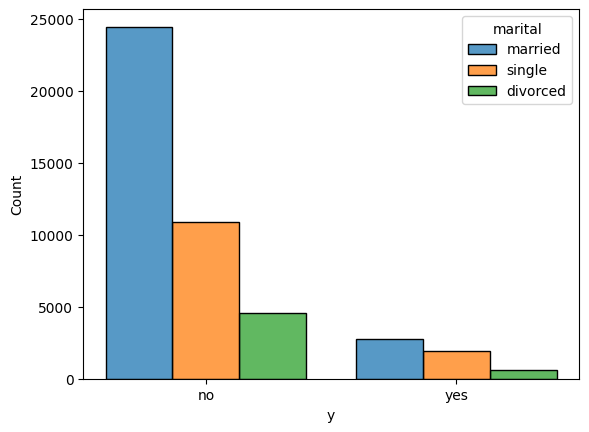

In [ ]:
sns.histplot(data=df, x="y", hue="marital", multiple= "dodge", shrink=.8)

<Axes: xlabel='y', ylabel='Count'>

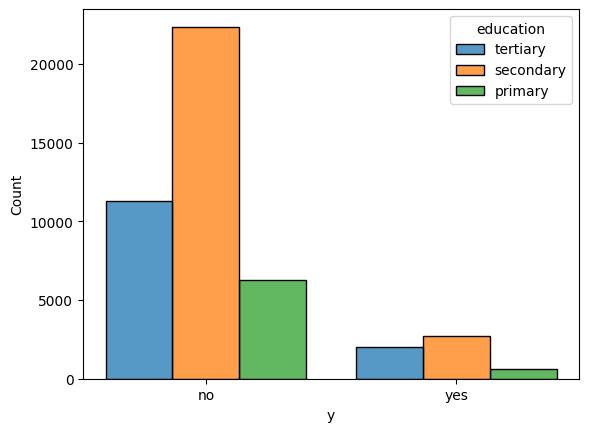

In [ ]:
sns.histplot(data=df, x="y", hue="education", multiple= "dodge", shrink=.8)




---


Se observa que la variable más relevante a la hora de predecir si una persona realizará un deposito es la educación y su trabajo, pues los resultados varían más si es que una persona trabaja en "managment" u en otro trabajo. Lo mismo se observa con la variable "education", donde las personas con nivel de educacion "secondary" tienen mas taza de realizar depositos que las otras personas con otro nivel


---

### Pregunta 1.3

Identifique _outliers_ entre las variables numéricas del dataset. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

<Axes: >

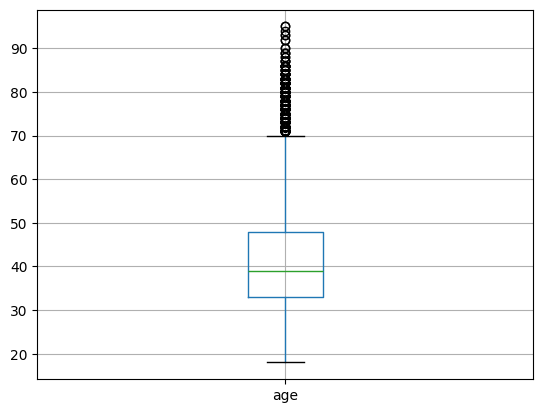

In [5]:
#Identificar outliers en las variables numericas con la cosntruccion de diagramas de caja
df.boxplot(column=["age"])
#No se observan outliers en variable age

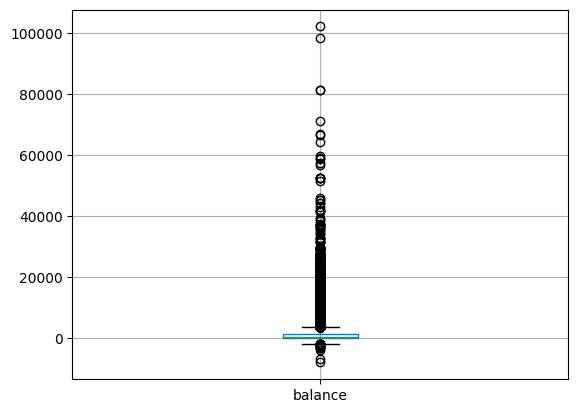

In [39]:
df.boxplot(column=["balance"])
df = df[df["balance"]<80000]
#Para balance se observa que ultimo grupo de datos se centran alrededor de 60000, mas alla de ese valor es outlier

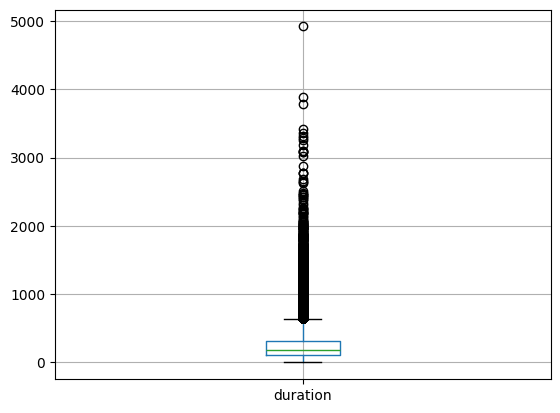

In [40]:
df.boxplot(column=["duration"])
df = df[df["duration"]<4000]
#Para duration se observa que ultimo grupo de datos se centran alrededor de 3000, mas alla de ese grupo es outlier

<Axes: >

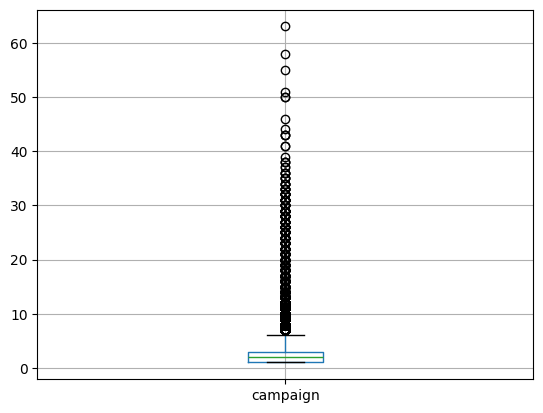

In [22]:
df.boxplot(column=["campaign"])
#No se observan outliers en variable campaign

<Axes: >

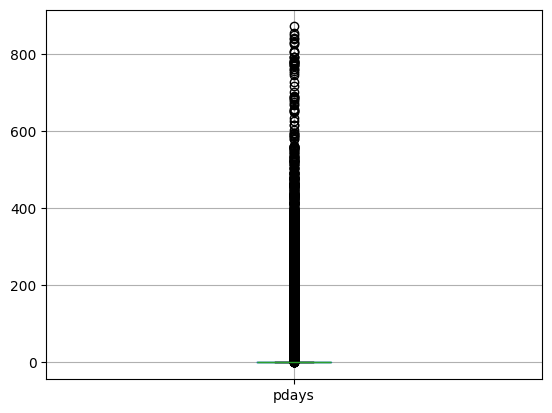

In [ ]:
df.boxplot(column=["pdays"])
#No se observan outliers en variable pdays

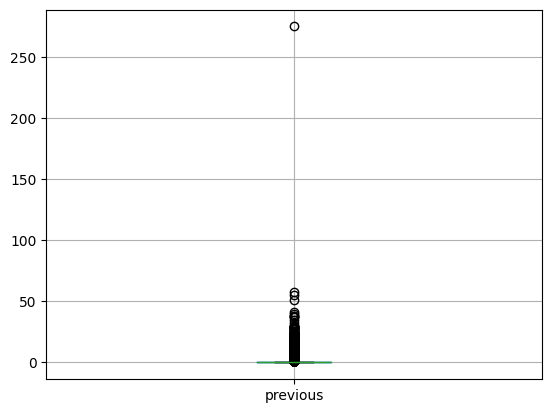

In [41]:
df.boxplot(column=["previous"])
#Para previous se observa que ultimo grupo de datos se centran alrededor de 50, mas alla de ese grupo es outlier.
df = df[df["previous"]<100]
#Se observa que, luego del filtro, las variables por encima de 50 parecen ser outliers al estar tan alejados de 40
df = df[df["previous"]<50]




---


Se decide imputar outliers si es que estos son muy diferentes a comparacion del resto de valores de la base de datos pues son datos que no se repiten en el resto de observaciones, lo que puede significar que se haya medido de una forma distinta.}
En el caso de "previous", el outlier indica que han pasado mas de 250 dias sin haberse contactado con esa persona desde la ultima campaña


---

## Feature Engineering

### Pregunta 1.4

 Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas No Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.



In [44]:
#Importar funcion Standarscaler, pipeline y columntransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Identificar variables categoricas no binarias
categoricas_no_binarias = ["job", "marital", "education", "month"]
#Identificar variables numericas
numericas = ["age", "balance", "duration", "campaign", "pdays", "previous"]

#Crear el transformador de columnas; preprocesador
preproceso = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), numericas),
        ('cat', OneHotEncoder(), categoricas_no_binarias),
        ('drop', 'drop', ['day_of_week'])
    ],
    remainder='passthrough'
)
#Pipeline
pipeline = Pipeline([
    ("preprocessing", preproceso)
])
#Transformar columnas
df_procesado = pipeline.fit_transform(df)
shape_original = df.shape
shape_procesado = df_procesado.shape
print("Forma original: ", shape_original)
print("Forma procesada: ", shape_procesado)

Forma original:  (45202, 15)
Forma procesada:  (45202, 39)


## Modelos

En esta sección aplicaremos los algoritmos de clasificación vistos en el curso. Específicamente, compararemos el rendimiento de los siguientes modelos:

*   _Decision Tree Classifier_
*   _Random Forest Classifier_
*   _XGBoost Classifier_
*   _Naïve Bayes_



### Pregunta 1.5

Divida el conjunto de datos en conjuntos de entrenamiento y de prueba. Analice la distribución de la variable objetivo en ambos conjuntos para determinar si el conjunto de datos está balanceado o no.

En caso de que el conjunto de datos no esté balanceado, asegúrese de que la división de _train_-_test_ respete el balance de las clases target para evitar que se genere un sesgo. Para esto, se recomienda leer la documentación oficial de la función `train_test_split()`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.

Use la semilla `random_state` = 123.


### Pregunta 1.6

Entrene un árbol clasificador sin definir profundad máxima del árbol. Llamaremos a este, "modelo no regularizado".

Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `DecisionTreeClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento. Luego, grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?




---


*Escriba* su respuesta en esta celda...


---


### Pegunta 1.7

En el contexto particular de una campaña de marketing, donde probablemente la mayoría de clientes no harán depósitos, es importante identificar correctamente tanto los clientes que harán depósitos (clase minoritaria), como los clientes que no harán depósitos.

En el primer caso, falsos negativos implican un cliente peridido. En el segundo caso, falsos positivos implicarían un gasto de marketing innecesario en clientes que no son de interés. En este sentido, si clasificamos a todos los clientes como individuos que no harán depósitos, el _accuracy_ será muy alto, pero el costo económico será muy grande.

Para penalizar tanto falsos positivos, como falsos negativos, a la vez que se busca maximizar los verdaderos positivos, nos enfocaremos en la métrica de _performance_ $F_1\ Score$.

Calcule el $F_1\ Score$ de su árbol no regularizado con la muestra correcta. ¿Considera que es un buen valor? Comente.




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.8

Entrene un árbol clasificador con profundad máxima del árbol igual a 16. Llamaremos a este, "modelo levemente regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.9

Entrene un árbol clasificador con profundad máxima del árbol igual a 8. Llamaremos a este, "modelo regularizado". Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Luego, despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.

Grafique una representación del árbol entrenado. ¿Qué puede decir sobre este modelo no regularizado?





---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.10

Entrene 20 árboles de clasificación. Cada uno de ellos debe estar entrenado fijando la profundidad máxima del árbol `max_depth` igual a $n \in [1,20]$. Obtenga el $F_1\ Score$ de cada árbol con la base de entrenamiento y la base de prueba.

Gafique en una misma figura $F_1\ Score$ de entrenamiento contra $n$ y $F_1\ Score$ de prueba contra $n$ (Eje X = $n$). ¿Cuál parece ser el parámetro óptimo $n^*$ para el árbol? ¿Qué puede decir sobre el parámetro sobre _overfitting_ y generalización?




---


*Escriba* su respuesta en esta celda...


---


### Pregunta 1.11

En esta pregunta deberá entrenar _Random orest Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Realice _Cross Validation_ con un _folding_ con `K=5` y calcule $F_1\ Score$ de todas las posibles combinaciones de los siguientes parámetros:

- `n_estimators = {100, 1000}`
- `max_depth = {10, 50, 100}`
- `min_samples_leaf = {2, 4}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta. Finalmente, reporte el $F_1\ Score$ con la muestra de prueba.

Cuando realice _Cross Validation_ y cuando entrene el modelo final, asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `RandomForestClassifier()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.



### Pregunta 1.12

En esta pregunta deberá entrenar _XGBpost Classifier_ realizando un ejercicio previo de _hyperparameter tuning_.

Repita el ejercicio de _Cross Validation_ anterior, pero está vez evaluando:

- `n_estimators = {100, 1000}`
- `max_depth = {5, 50, 100}`
- `learning_rate = {0.05, 0.1, 0.5}`
- `max_leaves= {2, 4, 10}`

Determine la mejor combinación de parámetros y vuelva a entrenar su bosque con esta, reportando el $F_1\ Score$ con la muestra de prueba.

Asegúrese de que sus modelos sean capaces de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `XGBClassifier()` (parámetros de inicialización): https://xgboost.readthedocs.io/en/latest/python/python_api.html.


### Pregunta 1.13

Entrene un modelo _Naïve Bayes_. Asegúrese de que el modelo sea capaz de lidiar con potenciales desbalances. Para esto se recomienda leer la documentación oficial de la *clase* `GaussianNB()` (parámetros de inicialización): https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html.


Despliege el $F_1\ Score$ del modelo sobre la base de entrenamiento.



---



## Análisis Comparativo de Modelos de Clasificación


### Pregunta 1.14

Evalúe y compare el desempeño de los modelos teniendo en cuenta la naturaleza del conjunto de datos. ¿Cómo afectó el desbalance a cada modelo? ¿Qué modelo manejó mejor el balance o desbalance de clases y cuáles son sus conclusiones generales sobre su rendimiento comparado?

Para que la comparación sea clara, es útil indicar qué métricas de evaluación utilizo para comparar los modelos (por ejemplo, F1-score, precisión, recall, AUC, etc.).




---


*Escriba* su respuesta en esta celda...


---


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.




---


*Escriba* su respuesta en esta celda...


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.




---


*Escriba* su respuesta en esta celda...


---


## Feature Engineering


### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.






---


*Escriba* su respuesta en esta celda...


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


---


*Escriba* su respuesta en esta celda...


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [ ]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


---


*Escriba* su respuesta en esta celda...


---